# Performance of semantle solvers and similarity models

Compare solvers with a sequence of guesses from people

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

from cohort_bayes_solver import CohortBayesSolver
from gradient_solver import GradientSolver
from semantle_simulator import SemantleSimulator

import gradient_solver_2 as gs2
import vocabulary as voc
import similarity_model as sm
import performance as perf

## Simulator for semantle

In [2]:
sem_sim = SemantleSimulator()

In [3]:
sample_targets = ['terrible', 'habitat', 'carrot', 'gather', 'amendment', 'worried', 'significant']
sem_sim.target = sample_targets[3]

## Agent similarity model

In [4]:
base_vocabulary_ews = voc.VocabularyEWS()
voc.add_missing_words(base_vocabulary_ews, sample_targets)
base_vocabulary_uf = voc.VocabularyUF()

similarity_w2v_ews = sm.SimilarityModelW2V(base_vocabulary_ews, sem_sim.wv)
similarity_w2v_uf = sm.SimilarityModelW2V(base_vocabulary_uf, sem_sim.wv)
similarity_use_ews = sm.SimilarityModelUSE(base_vocabulary_ews)
similarity_use_uf = sm.SimilarityModelUSE(base_vocabulary_uf)

2023-02-19 16:08:55.042696: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Evaluate vocabulary delta cohort w2v

In [5]:
ctor = lambda: CohortBayesSolver(similarity_w2v_ews, precision=0.1, recall=0.5)
trial_cohort_ews, target_cohort_ews = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

.

In [6]:
ctor = lambda: CohortBayesSolver(similarity_w2v_uf, precision=0.1, recall=0.5)
trial_cohort_uf, target_cohort_uf = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

.

In [7]:
np.mean(trial_cohort_ews), np.mean(trial_cohort_uf), ks_2samp(trial_cohort_ews, trial_cohort_uf)

(31.5, 56.5, KstestResult(statistic=0.4, pvalue=0.41752365281777043))

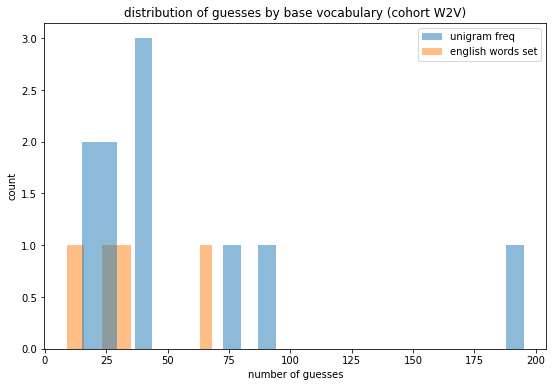

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.hist(trial_cohort_uf, alpha=0.5, bins=25, zorder=100)
plt.hist(trial_cohort_ews, alpha=0.5, bins=25)
plt.legend(['unigram freq', 'english words set'])
plt.title('distribution of guesses by base vocabulary (cohort W2V)')
plt.xlabel('number of guesses')
plt.ylabel('count')
plt.show()

## Evaluate vocabulary delta gradient use

In [9]:
ctor = lambda: GradientSolver(similarity_use_ews)
trial_gradient_ews, target_gradient_ews = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

.

In [10]:
ctor = lambda: GradientSolver(similarity_use_uf)
trial_gradient_uf, target_gradient_uf = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

.

In [11]:
np.mean(trial_gradient_ews), np.mean(trial_gradient_uf), ks_2samp(trial_gradient_ews, trial_gradient_uf)

(357.4, 187.8, KstestResult(statistic=0.6, pvalue=0.05244755244755244))

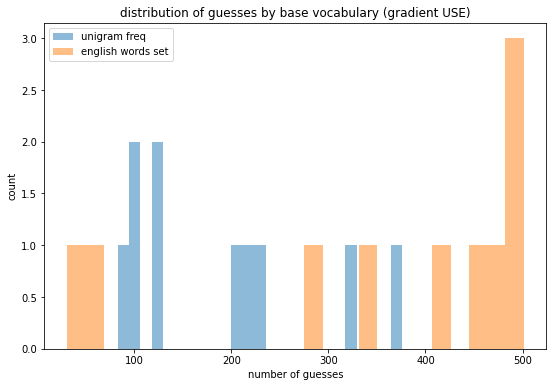

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.hist(trial_gradient_uf, alpha=0.5, bins=25, zorder=100)
plt.hist(trial_gradient_ews, alpha=0.5, bins=25)
plt.legend(['unigram freq', 'english words set'])
plt.title('distribution of guesses by base vocabulary (gradient USE)')
plt.xlabel('number of guesses')
plt.ylabel('count')
plt.show()

In [13]:
capped = np.array(trial_gradient_ews)
np.unique(np.array(target_gradient_ews)[np.argwhere(capped >= 500)], return_counts=True)

(array(['carrot', 'habitat'], dtype='<U11'), array([1, 2]))